### 統計學習與深度學習
### Homework 4

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。

#### Multilayer Perceptrons for Regression
本次作業的主角是 Multilayer perceptrons (MLP)。我們將以MLP建構迴歸模型，探討各項相關議題。


#### Dataset: Million Songs Dataset
本次作業將使用"Million Songs Dataset"作為訓練與測試資料。請使用`pickle.load()`載入*msd_full.pickle*。這個資料集已經切割好了訓練與測試資料，並存放在一個Dictionary的結構。這個Dictionary有四個元素，x_train, y_train, x_test, y_test，分別對應到訓練特徵、訓練標記(Label)、測試特徵、測試標記。 標記變數 (label variable; i.e., $y$) 是歌曲發行年度。特徵為歌曲的聲音特性。迴歸任務為預測歌曲年分。

#### Prediction Performance and Loss Function
模型訓練應主要使用Sum of Squared Error (SSE)建構Loss Function，另外我們也會練習使用其他種類的Loss Function。為了讓圖表易於理解，不論Loss Function為何，報告預測能力應使用Root Mean Squared Error (RMSE)。使用SSE或RMSE建構Loss Function在本質上沒有差別。但SSE計算成本稍低，而RMSE較有直觀意義。


#### Subtraining, Validation, and Test Datasets
*msd_full.pickle* 檔案中的訓練資料已經隨機排序過。你應該使用訓練資料最後10%的資料做為Validation Set。其餘的前90%做為Subtraining Set。使用Subtraining Set來訓練資料，並以Validation Set作為參數調教與Early Stopping的依據。Test RMSE應使用測試資料計算得之。

所有特徵應該標準化(均數為零，變異數為一)。標準化應該以訓練資料(注意不是Test Set or Subtraining Set)的統計量為之。標記變數(i.e., $y$)應將均數平移至0 (依照訓練資料的統計量)。標記變數的變異數不要調整。


#### Minibatch, Epoch, and Early Stopping
如果沒有特別說明，模型訓練時應以大小為1,000個資料點的Minibatch為之。模型使用一個Minibatch的資料更新參數之後稱為經歷了一個Batch。當所有Subtraining資料已經用來更新過模型參數，稱為經過了一個Epoch。

模型訓練應使用Early Stopping決定最佳的模型。模型訓練時每100個Batch計算一次Training and Validation RMSE。如果Validation為歷史最低，則記下當下的模型參數與當時已進行的Batch數量，稱為best_step_count。如由best_step_count起算已經經過了5,000個Batch而沒有更好的Validation RMSE，則停止模型訓練，並以best_step_count時的模型參數做為最後的模型訓練結果。如果模型訓練最多執行100個epoch。如果模型已經執行了100個epoch而沒有Early Stop，則應使用歷史最佳的Validation RMSE所對應到的模型參數計算Test RMSE。


#### Implementation Restriction
使用Pytorch建構MLP模型。Ordinary Least Square (OLS)模型訓練沒有限制使用何種套件。

#### 資料載入
使用下面的程式碼載入資料:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pickle
DATA_PATH = "/content/drive/My Drive"
infile = open(DATA_PATH+'/msd_full.pickle','rb')
msd_data = pickle.load(infile)

In [4]:
# load packages
%matplotlib inline
import pickle
from sklearn import preprocessing

# # Load data
# with open('msd_full.pickle', 'rb') as fh1:
#     msd_data = pickle.load(fh1)

doscaling = 1
if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    # standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test'].astype('float32')
X_test = X_test.astype('float32')

y_mean = Y_train.mean()
Y_train_keep = Y_train.copy()
Y_test_keep = Y_test.copy()
Y_train = Y_train - y_mean
Y_test = Y_test - y_mean


# validation is the last 10% of training, subtraining is the first 90% of training
nvalid = int(X_train.shape[0] * 0.1)
nsubtrain = X_train.shape[0] - nvalid

X_subtrain = X_train[0:nsubtrain, :].astype('float32')
X_valid = X_train[nsubtrain:, :].astype('float32')
Y_subtrain = Y_train[0:nsubtrain].astype('float32')
Y_valid = Y_train[nsubtrain:].astype('float32')

Y_subtrain_keep = Y_train_keep[0:nsubtrain].astype('float32')
Y_valid_keep = Y_train_keep[nsubtrain:].astype('float32')

print("X_train shape = ", X_train.shape)
print("Y_train shape = ", Y_train.shape)

print("\nX_subtrain shape = ", X_subtrain.shape)
print("Y_subtrain shape = ", Y_subtrain.shape)

print("\nX_valid shape = ", X_valid.shape)
print("Y_valid shape = ", Y_valid.shape)

print("\nX_test shape = ", X_test.shape)
print("Y_test shape = ", Y_test.shape)

X_train shape =  (463715, 90)
Y_train shape =  (463715,)

X_subtrain shape =  (417344, 90)
Y_subtrain shape =  (417344,)

X_valid shape =  (46371, 90)
Y_valid shape =  (46371,)

X_test shape =  (51630, 90)
Y_test shape =  (51630,)


### 回答下面問題

#### Q1 (5%)
使用Training資料訓練一個Ordinary Least Square模型，並進行預測。列出此模型的RMSE與前五個特徵的參數。OLS模型應包含常數項，且不應有任何Regularization。

#### Q2 MLP with Four Hidden Layers (15%)
建構一個有四層Hidden Layer的MLP。此模型由輸入層開始，90個Input Features通過線性層轉換為H個Hidden Nodes，並通過ReLu Activation Function，此為第一層Hidden Layer。
接著通過下一個線性層與ReLu Activation Function，此為第二層。接著下一個線性層與ReLu Activation Function，此為第三層。
然後下一個線性層與ReLu Activation Function，此為第四層。最後通過一個線性層輸出。
所有Hidden Layer的寬度都為H。

令H= 45, 使用Stochastic Gradient Descent更新參數，設Learning Rate = 0.00001，無Weight Decay與Momentum。畫出模型訓練過程中的Training與Validation RMSE，列出Test RMSE。 並討論訓練過程中Training與Validation RMSE的圖形意義。

#### Q3 (10%)
重複上題步驟，使用H = 90與180。無須畫訓練過程的RMSE。列出這兩個Test RMSE。討論H = 45, 90, 180的Test RMSE。

#### Q4 (15%)
使用Q2的模型設定，考慮 H = 45, 90, 180與Weight Decay = 0.1, 0.2, 0.4的所有組合。模型估計後做表整理Test RMSE。討論H的選擇應為多少較合理?

#### Q5 MLP with Dropout (15%)
建構一個有Dropout的四層Hidden Layer的MLP。此模型由輸入層開始，第一層由90個Input Features通過線性層轉換為H個Hidden Nodes，通過ReLu Activation Function，之後對Hidden Unit Dropout，機率為0.5。後面各Hidden Lyaer均在ReLu後有Dropout，機率皆為0.5。最後通過一個線性層輸出。所有Hidden Layer的寬度都為H。

令H= 90, 使用Adaptive Moment Estimation (Adam)更新參數，設Learning Rate = 0.001，無Weight Decay與Momentum，其他參數使用預設值。畫出模型訓練過程中的Training與Validation RMSE，列出Test RMSE。 並討論訓練過程中Training與Validation RMSE的圖形意義。

#### Q6 Explore Number of Hidden Units (10%)
使用上題的模型，考慮H = 20, 180, 360。 討論H = 20, 45, 180, 360的Test RMSE。

#### Q7 L2 + L1 Loss (15%)
我們前面的小題皆是使用SSE，也就是L2 Loss。一個改善模型訓練的方式是使用多種類似的Loss，以線性組合的方式建構Loss Function。請使用Q5中的MLP with Dropout模型 (H = 90)，並以L2 + L1 Loss訓練模型。這個Loss的定義如下:

$$
loss(\mathbf{y}, \hat{\mathbf{y}}) = z \sum_{i=1}^n (y_i - \hat{y}_i)^2 + (1 - z) \sum_{i = 1}^n | y_i - \hat{y}_i |,
$$
其中z為實數且$0 <=z <= 1$。

使用z = 0.5。並以Adam訓練模型。畫出Training and Validation RMSE，並報告Test RMSE。注意這裡繪圖時應使用RMSE而不是這個特殊的Loss。

另外，使用z = 0.0, 0.1, 0.9, 1.0訓練模型(不須提供訓練過程的Loss圖形)，統整各個z值下的Test RMSE並討論。

#### Q8 L2 + Customerized Loss (15%)
考慮另一個比較特別的Loss Function

$$
qloss(\mathbf{y}, \hat{\mathbf{y}}) = \sum_{i=1}^n \{ q (y_i - \hat{y}_i)_+ + (1 - q) (\hat{y}_i - y_i)_+ \},
$$
其中q為參數且$0<=q<=1$，而$(y_i - \hat{y}_i)_+$是取正值的意思。也就是說如果$(y_i - \hat{y}_i) > 0$，則$(y_i - \hat{y}_i)_+ = y_i - \hat{y}_i$，否則$(y_i - \hat{y}_i)_+ = 0$。

令模型的Loss為$z \sum_{i=1}^n (y_i - \hat{y}_i)^2 + (1 - z) \sum_{i=1}^n \{ 0.5 (y_i - \hat{y}_i)_+ + 0.5 (\hat{y}_i - y_i)_+ \} $。請使用Q5中的MLP with Dropout模型(H = 90)，令z = 0。並以Adam訓練模型。畫出Training and Validation RMSE，並報告Test RMSE。注意這裡繪圖時應使用RMSE而不是這個特殊的Loss。

另外，使用z = 0.1, 0.5, 0.9, 1.0訓練模型(不須提供訓練過程的Loss圖形)，統整各個z值下的Test RMSE並討論。


# A1

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
import sklearn as sk
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)

In [7]:
(sk.metrics.mean_squared_error(Y_test, Y_pred))**(1/2)

9.510160684544399

此模型的RMSE為9.51

In [8]:
for i in range(5):
  print(reg.coef_[i])

5.3097526499730625
-2.8808811379532635
-1.5323434812890016
0.05737582636426097
-0.3395288910991756


前五項特徵的參數為
5.3097526499730625,
-2.8808811379532635,
-1.5323434812890016,
0.05737582636426097,
-0.3395288910991756,



# A2

In [9]:
import torch
from torch.utils import data

class Dataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, Xnp, Ynp):
        'Initialization, passing Xnp and Ynp'
        self.labels = Ynp
        self.nobs = Xnp.shape[0]        
        self.Xnp = Xnp
        self.Ynp = Ynp
  def __len__(self):
        'Denotes the total number of samples'
        return self.nobs
  def __getitem__(self, index):
        'Generates one sample of data'        
        X = self.Xnp[index]
        y = self.Ynp[index]
        return X, y
    
#y_train is a pandas.core.series.Series    
trainset = Dataset(X_train, Y_train)
subtrainset = Dataset(X_subtrain, Y_subtrain)
validset = Dataset(X_valid, Y_valid)
testset = Dataset(X_test, Y_test)

In [10]:
trainloader = data.DataLoader(trainset, batch_size=1000, shuffle=True, num_workers=0)
subtrainloader = data.DataLoader(subtrainset, batch_size=1000, shuffle=True, num_workers=0)
validloader = data.DataLoader(validset, batch_size=1000, shuffle=True, num_workers=0)
testloader = data.DataLoader(testset, batch_size=1000, shuffle=True, num_workers=0)

In [11]:
X_batch, Y_batch = next(iter(subtrainloader))
print("X_batch size:", X_batch.size())
print("Y_batch size:", Y_batch.size())

X_batch size: torch.Size([1000, 90])
Y_batch size: torch.Size([1000])


In [12]:
use_cuda = torch.cuda.is_available()
if use_cuda:
    device = "cuda"   
else:
    device = "cpu"
print("Running on device: ", device)

Running on device:  cuda


In [13]:
D_in = trainset.Xnp.shape[1]
H = 45

D_out = 1
use_cuda = torch.cuda.is_available()

net = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),  
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
)
# convert everything to float precision. 
net = net.float()
# move the model to device (i.e., cpu or gpu)
net = net.to(device)

# define the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.00001)
loss_fn = torch.nn.MSELoss(reduction="sum")

In [ ]:
nepoch = 100
step_count = 0
log_interval = 100

SSE = 0
MSE = 0
stop_count = 0
best_step_count = 0

train_RMSE = np.array([])
valid_RMSE = np.array([])
best_valid_RMSE = 10000

weight = []

for epoch_id in range(0, nepoch):      
    for batch_idx, (inputs, targets) in enumerate(subtrainloader):
        #reshape target to two-dimensional array
        targets = targets.reshape((-1, 1))
        step_count += 1        
        net.train()
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs.float())        
        loss = loss_fn(outputs.float(), targets.float())

        SSE += loss.item()
        RMSE = (SSE/(step_count*1000))**(1/2)
        train_RMSE = np.append(train_RMSE, RMSE)

        loss.backward()
        optimizer.step()
        # print(list(net.parameters()))

        with torch.no_grad():
            valid_SSE = 0
            for batch_idx, (inputs, targets) in enumerate(validloader):            
                inputs, targets = inputs.to(device), targets.to(device)
                targets = targets.reshape((-1, 1))
                outputs = net(inputs)
                cn_loss = loss_fn(outputs, targets)
                valid_SSE += cn_loss.item()

            valid_tem_rmse = (valid_SSE/46371)**(1/2)
            valid_RMSE = np.append(valid_RMSE, valid_tem_rmse)

        # if step_count % log_interval == 0:            
            # print("Epoch %d Step %d Loss = %.3f (minibatch size = %d)" % (epoch_id, step_count, loss.item(), len(targets)))
            # print(RMSE)
            # print(valid_tem_rmse)

        if valid_tem_rmse < best_valid_RMSE:
          best_valid_RMSE = valid_tem_rmse
          best_step_count = step_count
          stop_count = 0
          weight = net.parameters
          # print(weight)
        else:
          stop_count += 1
          print(stop_count)

        if stop_count == 5000:
          break
    if stop_count == 5000:
      break

In [231]:
print(best_step_count)

5072


<function matplotlib.pyplot.show>

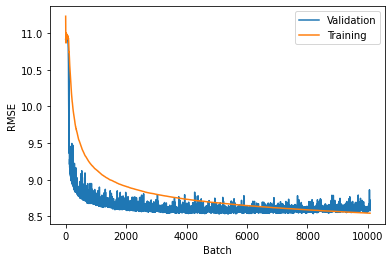

In [236]:
plt.plot(range(len(valid_RMSE)), valid_RMSE, label='Validation')
plt.plot(range(len(train_RMSE)), train_RMSE, label='Training')
plt.xlabel('Batch')
plt.ylabel('RMSE')
plt.legend()
plt.show

Training RMSE 線條較滑順，且持續在緩緩下降，因為learning rate小再加上套回自己本身的緣故，Training RMSE很少有上升的趨勢；而Validation RMSE則有許多小起伏，也相對Training較早收斂，在第5000個batch就遇到最小的RMSE了。

In [242]:
net.apply(weight)

with torch.no_grad():
  test_SSE = 0
  for batch_idx, (inputs, targets) in enumerate(testloader):            
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.reshape((-1, 1))
    outputs = net(inputs)
    cn_loss = loss_fn(outputs, targets)
    test_SSE += cn_loss.item()

  test_rmse = (test_SSE/51630)**(1/2)
print("Test RMSE(H=45) = %f" % test_rmse)

Test RMSE(H=45) = 8.867488


# A3 換成不同H
H= 90

In [ ]:
D_in = trainset.Xnp.shape[1]
H = 90
D_out = 1

net_90 = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),  
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
)
# convert everything to float precision. 
net_90 = net_90.float()
# move the model to device (i.e., cpu or gpu)
net_90 = net_90.to(device)


# define the optimizer
optimizer = torch.optim.SGD(net_90.parameters(), lr=0.00001)
loss_fn = torch.nn.MSELoss(reduction="sum")

nepoch = 100
step_count = 0
log_interval = 100

stop_count = 0
best_step_count_90 = 0

# valid_RMSE = np.array([])
best_valid_RMSE_90 = 10000

weight_90 = []

for epoch_id in range(0, nepoch):      
    for batch_idx, (inputs, targets) in enumerate(subtrainloader):
        #reshape target to two-dimensional array
        targets = targets.reshape((-1, 1))
        step_count += 1        
        net_90.train()
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net_90(inputs.float())        
        loss = loss_fn(outputs.float(), targets.float())

        loss.backward()
        optimizer.step()
        # print(list(net.parameters()))

        with torch.no_grad():
            valid_SSE = 0
            for batch_idx, (inputs, targets) in enumerate(validloader):            
                inputs, targets = inputs.to(device), targets.to(device)
                targets = targets.reshape((-1, 1))
                outputs = net_90(inputs)
                cn_loss = loss_fn(outputs, targets)
                valid_SSE += cn_loss.item()

            valid_tem_rmse = (valid_SSE/46371)**(1/2)
            # valid_RMSE = np.append(valid_RMSE, valid_tem_rmse)

        if valid_tem_rmse < best_valid_RMSE_90:
          best_valid_RMSE_90 = valid_tem_rmse
          best_step_count_90 = step_count
          stop_count = 0
          weight_90 = net_90.parameters
          # print(weight)
        else:
          stop_count += 1
          print(stop_count)
        
        if stop_count == 5000:
          break 
    if stop_count == 5000:
      break

In [245]:
print(best_step_count_90)

4464


In [241]:
net_90.apply(weight_90)

with torch.no_grad():
  test_SSE_90 = 0
  for batch_idx, (inputs, targets) in enumerate(testloader):            
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.reshape((-1, 1))
    outputs = net_90(inputs)
    cn_loss = loss_fn(outputs, targets)
    test_SSE_90 += cn_loss.item()

  test_rmse_90 = (test_SSE_90/51630)**(1/2)

print("Test RMSE(H=90) = %f" % test_rmse_90)

Test RMSE(H=90) = 8.967312


H = 180

In [ ]:
D_in = trainset.Xnp.shape[1]
H = 180
D_out = 1

net_180 = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),  
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Linear(H, D_out)
)
# convert everything to float precision. 
net_180 = net_180.float()
# move the model to device (i.e., cpu or gpu)
net_180 = net_180.to(device)


# define the optimizer
optimizer = torch.optim.SGD(net_180.parameters(), lr=0.00001)
loss_fn = torch.nn.MSELoss(reduction="sum")

nepoch = 100
step_count = 0
log_interval = 100

stop_count = 0
best_step_count_180 = 0

# valid_RMSE = np.array([])
best_valid_RMSE_180 = 10000

weight_180 = []

for epoch_id in range(0, nepoch):      
    for batch_idx, (inputs, targets) in enumerate(subtrainloader):
        #reshape target to two-dimensional array
        targets = targets.reshape((-1, 1))
        step_count += 1        
        net_180.train()
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net_180(inputs.float())        
        loss = loss_fn(outputs.float(), targets.float())

        loss.backward()
        optimizer.step()
        # print(list(net.parameters()))

        with torch.no_grad():
            valid_SSE = 0
            for batch_idx, (inputs, targets) in enumerate(validloader):            
                inputs, targets = inputs.to(device), targets.to(device)
                targets = targets.reshape((-1, 1))
                outputs = net_180(inputs)
                cn_loss = loss_fn(outputs, targets)
                valid_SSE += cn_loss.item()

            valid_tem_rmse = (valid_SSE/46371)**(1/2)
            # valid_RMSE = np.append(valid_RMSE, valid_tem_rmse)

        if valid_tem_rmse < best_valid_RMSE_180:
          best_valid_RMSE_180 = valid_tem_rmse
          best_step_count_180 = step_count
          stop_count = 0
          weight_180 = net_180.parameters
          # print(weight)
        else:
          stop_count += 1
          print(stop_count)
        
        if stop_count == 5000:
          break 
    if stop_count == 5000:
      break

In [249]:
print(best_step_count_180)

3486


In [248]:
net_180.apply(weight_180)

with torch.no_grad():
  test_SSE_180 = 0
  for batch_idx, (inputs, targets) in enumerate(testloader):            
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.reshape((-1, 1))
    outputs = net_180(inputs)
    cn_loss = loss_fn(outputs, targets)
    test_SSE_180 += cn_loss.item()

  test_rmse_180 = (test_SSE_180/51630)**(1/2)

print("Test RMSE(H=180) = %f" % test_rmse_180)

Test RMSE(H=180) = 9.123229


Test RMSE(H=45) = 8.867488 < Test RMSE(H=90) = 8.967312 < Test RMSE(H=180) = 9.123229


best_step_count_180 = 3486 < best_step_count_90 = 4464 < best_step_count = 5072


代表H越大，RMSE越大，越早碰到最小值。

# A4

In [14]:
for i in [45, 90, 180]:
  for j in [0.1, 0.2, 0.4]:
    D_in = trainset.Xnp.shape[1]
    H = i
    D_out = 1

    net = torch.nn.Sequential(
            torch.nn.Linear(D_in, H),  
            torch.nn.ReLU(),
            torch.nn.Linear(H, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, H),
            torch.nn.ReLU(),
            torch.nn.Linear(H, D_out)
    )
    # convert everything to float precision. 
    net = net.float()
    # move the model to device (i.e., cpu or gpu)
    net = net.to(device)


    # define the optimizer
    optimizer = torch.optim.SGD(net.parameters(), lr=0.00001, weight_decay=j)
    loss_fn = torch.nn.MSELoss(reduction="sum")

    nepoch = 100
    step_count = 0
    log_interval = 100

    stop_count = 0
    best_step_count = 0

    # valid_RMSE = np.array([])
    best_valid_RMSE = 10000

    weight = []

    for epoch_id in range(0, nepoch):      
        for batch_idx, (inputs, targets) in enumerate(subtrainloader):
            #reshape target to two-dimensional array
            targets = targets.reshape((-1, 1))
            step_count += 1        
            net.train()
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = net(inputs.float())        
            loss = loss_fn(outputs.float(), targets.float())

            loss.backward()
            optimizer.step()
            # print(list(net.parameters()))

            with torch.no_grad():
                valid_SSE = 0
                for batch_idx, (inputs, targets) in enumerate(validloader):            
                    inputs, targets = inputs.to(device), targets.to(device)
                    targets = targets.reshape((-1, 1))
                    outputs = net(inputs)
                    cn_loss = loss_fn(outputs, targets)
                    valid_SSE += cn_loss.item()

                valid_tem_rmse = (valid_SSE/46371)**(1/2)
                # valid_RMSE = np.append(valid_RMSE, valid_tem_rmse)

            if valid_tem_rmse < best_valid_RMSE:
              best_valid_RMSE = valid_tem_rmse
              best_step_count = step_count
              stop_count = 0
              weight = net.parameters
              # print(weight)
            else:
              stop_count += 1
              # print(stop_count)
            
            if stop_count == 5000:
              break 
        if stop_count == 5000:
          break

    net.apply(weight)

    with torch.no_grad():
      test_SSE = 0
      for batch_idx, (inputs, targets) in enumerate(testloader):            
        inputs, targets = inputs.to(device), targets.to(device)
        targets = targets.reshape((-1, 1))
        outputs = net(inputs)
        cn_loss = loss_fn(outputs, targets)
        test_SSE += cn_loss.item()

      test_rmse = (test_SSE/51630)**(1/2)

    print("When H=" + str(i) + " and Weight Decay=" + str(j) + " , test_rmse is " + str(test_rmse))

When H=45 and Weight Decay=0.1 , test_rmse is 8.872259101123923
When H=45 and Weight Decay=0.2 , test_rmse is 8.867624350134472
When H=45 and Weight Decay=0.4 , test_rmse is 8.847407012554687
When H=90 and Weight Decay=0.1 , test_rmse is 9.048492780780665
When H=90 and Weight Decay=0.2 , test_rmse is 8.941541186287406


KeyboardInterrupt: ignored

程式碼已經完成，但沒能及時跑出全部資料。以現有的資訊來看H越大時Test RMSE越大，而當Weight Decay變大時，Test RMSE則會變小

# A5

In [ ]:
D_in = trainset.Xnp.shape[1]
H = 90

D_out = 1
use_cuda = torch.cuda.is_available()

net = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),  
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(H, D_out)
)
# convert everything to float precision. 
net = net.float()
# move the model to device (i.e., cpu or gpu)
net = net.to(device)

# define the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss(reduction="sum")


nepoch = 100
step_count = 0
log_interval = 100

SSE = 0
MSE = 0
stop_count = 0
best_step_count = 0

train_RMSE = np.array([])
valid_RMSE = np.array([])
best_valid_RMSE = 10000

weight = []

for epoch_id in range(0, nepoch):      
    for batch_idx, (inputs, targets) in enumerate(subtrainloader):
        #reshape target to two-dimensional array
        targets = targets.reshape((-1, 1))
        step_count += 1        
        net.train()
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs.float())        
        loss = loss_fn(outputs.float(), targets.float())

        SSE += loss.item()
        RMSE = (SSE/(step_count*1000))**(1/2)
        train_RMSE = np.append(train_RMSE, RMSE)

        loss.backward()
        optimizer.step()
        # print(list(net.parameters()))

        with torch.no_grad():
            valid_SSE = 0
            for batch_idx, (inputs, targets) in enumerate(validloader):            
                inputs, targets = inputs.to(device), targets.to(device)
                targets = targets.reshape((-1, 1))
                outputs = net(inputs)
                cn_loss = loss_fn(outputs, targets)
                valid_SSE += cn_loss.item()

            valid_tem_rmse = (valid_SSE/46371)**(1/2)
            valid_RMSE = np.append(valid_RMSE, valid_tem_rmse)

        # if step_count % log_interval == 0:            
            # print("Epoch %d Step %d Loss = %.3f (minibatch size = %d)" % (epoch_id, step_count, loss.item(), len(targets)))
            # print(RMSE)
            # print(valid_tem_rmse)

        if valid_tem_rmse < best_valid_RMSE:
          best_valid_RMSE = valid_tem_rmse
          best_step_count = step_count
          stop_count = 0
          weight = net.parameters
          # print(weight)
        else:
          stop_count += 1
          # print(stop_count)

        if stop_count == 5000:
          break
    if stop_count == 5000:
      break

In [17]:
print(best_step_count)

12851


In [16]:
print(stop_count)

3098


由於來不及跑完，我先中止上面執行結果，畫出圖形。

<function matplotlib.pyplot.show>

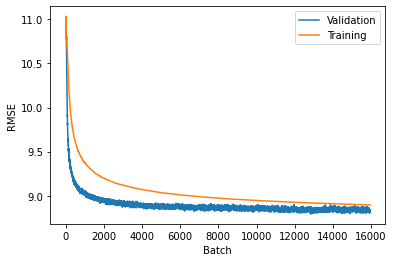

In [18]:
plt.plot(range(len(valid_RMSE)), valid_RMSE, label='Validation')
plt.plot(range(len(train_RMSE)), train_RMSE, label='Training')
plt.xlabel('Batch')
plt.ylabel('RMSE')
plt.legend()
plt.show

這是Validation RMSE的起伏變化較小，兩種RMSE都已於2000多就開始趨近於平緩，但是Training RMSE始終都比較高。

In [19]:
net.apply(weight)

with torch.no_grad():
  test_SSE = 0
  for batch_idx, (inputs, targets) in enumerate(testloader):            
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.reshape((-1, 1))
    outputs = net(inputs)
    cn_loss = loss_fn(outputs, targets)
    test_SSE += cn_loss.item()

  test_rmse = (test_SSE/51630)**(1/2)
print("Test RMSE(H=90) = %f" % test_rmse)

Test RMSE(H=90) = 9.031952


# A6

In [ ]:
for i in [20, 45, 180, 360]:
  D_in = trainset.Xnp.shape[1]
  H = i

  D_out = 1
  use_cuda = torch.cuda.is_available()

  net = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),  
          torch.nn.ReLU(),
          torch.nn.Dropout(p=0.5),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Dropout(p=0.5),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Dropout(p=0.5),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Dropout(p=0.5),
          torch.nn.Linear(H, D_out)
  )
  # convert everything to float precision. 
  net = net.float()
  # move the model to device (i.e., cpu or gpu)
  net = net.to(device)

  # define the optimizer
  optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
  loss_fn = torch.nn.MSELoss(reduction="sum")


  nepoch = 100
  step_count = 0
  log_interval = 100

  SSE = 0
  MSE = 0
  stop_count = 0
  best_step_count = 0

  train_RMSE = np.array([])
  valid_RMSE = np.array([])
  best_valid_RMSE = 10000

  weight = []

  for epoch_id in range(0, nepoch):      
      for batch_idx, (inputs, targets) in enumerate(subtrainloader):
          #reshape target to two-dimensional array
          targets = targets.reshape((-1, 1))
          step_count += 1        
          net.train()
          inputs, targets = inputs.to(device), targets.to(device)
          optimizer.zero_grad()
          outputs = net(inputs.float())        
          loss = loss_fn(outputs.float(), targets.float())

          SSE += loss.item()
          RMSE = (SSE/(step_count*1000))**(1/2)
          train_RMSE = np.append(train_RMSE, RMSE)

          loss.backward()
          optimizer.step()
          # print(list(net.parameters()))

          with torch.no_grad():
              valid_SSE = 0
              for batch_idx, (inputs, targets) in enumerate(validloader):            
                  inputs, targets = inputs.to(device), targets.to(device)
                  targets = targets.reshape((-1, 1))
                  outputs = net(inputs)
                  cn_loss = loss_fn(outputs, targets)
                  valid_SSE += cn_loss.item()

              valid_tem_rmse = (valid_SSE/46371)**(1/2)
              valid_RMSE = np.append(valid_RMSE, valid_tem_rmse)

          # if step_count % log_interval == 0:            
              # print("Epoch %d Step %d Loss = %.3f (minibatch size = %d)" % (epoch_id, step_count, loss.item(), len(targets)))
              # print(RMSE)
              # print(valid_tem_rmse)

          if valid_tem_rmse < best_valid_RMSE:
            best_valid_RMSE = valid_tem_rmse
            best_step_count = step_count
            stop_count = 0
            weight = net.parameters
            # print(weight)
          else:
            stop_count += 1
            # print(stop_count)

          if stop_count == 5000:
            break
      if stop_count == 5000:
        break
  net.apply(weight)

  with torch.no_grad():
    test_SSE = 0
    for batch_idx, (inputs, targets) in enumerate(testloader):            
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.reshape((-1, 1))
      outputs = net(inputs)
      cn_loss = loss_fn(outputs, targets)
      test_SSE += cn_loss.item()

    test_rmse = (test_SSE/51630)**(1/2)
  print("Test RMSE(H=%d) = %f" % (i, test_rmse))

Test RMSE(H=20) = 9.393714


KeyboardInterrupt: ignored

Test RMSE(H=20) = 9.393714。程式碼已經完成，但沒能及時跑出全部資料。

# A7-1

In [ ]:
D_in = trainset.Xnp.shape[1]
H = 90

D_out = 1

net = torch.nn.Sequential(
        torch.nn.Linear(D_in, H),  
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(H, H),
        torch.nn.ReLU(),
        torch.nn.Dropout(p=0.5),
        torch.nn.Linear(H, D_out)
)
# convert everything to float precision. 
net = net.float()
# move the model to device (i.e., cpu or gpu)
net = net.to(device)

# define the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_fn_2 = torch.nn.MSELoss(reduction="sum")
loss_fn_1 = torch.nn.L1Loss(reduction="sum")


nepoch = 100
step_count = 0
log_interval = 100

SSE = 0
MSE = 0
stop_count = 0
best_step_count = 0

train_RMSE = np.array([])
valid_RMSE = np.array([])
best_loss = 10000000000000000000000

weight = []

for epoch_id in range(0, nepoch):      
    for batch_idx, (inputs, targets) in enumerate(subtrainloader):
        #reshape target to two-dimensional array
        targets = targets.reshape((-1, 1))
        step_count += 1        
        net.train()
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = net(inputs.float())        
        loss = 0.5*loss_fn_1(outputs.float(), targets.float()) + 0.5*loss_fn_2(outputs.float(), targets.float())

        SSE += loss.item()
        RMSE = (SSE/(step_count*1000))**(1/2)
        train_RMSE = np.append(train_RMSE, RMSE)

        loss.backward()
        optimizer.step()
        # print(list(net.parameters()))

        with torch.no_grad():
            valid_SSE = 0
            loss = 0
            for batch_idx, (inputs, targets) in enumerate(validloader):            
                inputs, targets = inputs.to(device), targets.to(device)
                targets = targets.reshape((-1, 1))
                outputs = net(inputs)
                cn_loss = loss_fn_2(outputs, targets)
                valid_SSE += cn_loss.item()
                cn_loss_mix = 0.5*loss_fn_1(outputs.float(), targets.float()) + 0.5*loss_fn_2(outputs.float(), targets.float())
                loss += cn_loss_mix

            valid_tem_rmse = (valid_SSE/46371)**(1/2)
            valid_RMSE = np.append(valid_RMSE, valid_tem_rmse)

        # if step_count % log_interval == 0:            
            # print("Epoch %d Step %d Loss = %.3f (minibatch size = %d)" % (epoch_id, step_count, loss.item(), len(targets)))
            # print(RMSE)
            # print(valid_tem_rmse)

        if loss.item() < best_loss:
          best_loss = loss
          best_step_count = step_count
          stop_count = 0
          weight = net.parameters
          # print(weight)
        else:
          stop_count += 1
          # print(stop_count)

        if stop_count == 5000:
          break
    if stop_count == 5000:
      break

KeyboardInterrupt: ignored

In [ ]:
print(stop_count)
print(best_step_count)

77
14599


還來不及做完

<function matplotlib.pyplot.show>

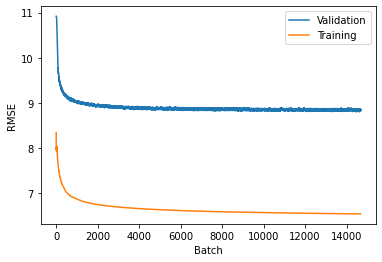

In [ ]:
plt.plot(range(len(valid_RMSE)), valid_RMSE, label='Validation')
plt.plot(range(len(train_RMSE)), train_RMSE, label='Training')
plt.xlabel('Batch')
plt.ylabel('RMSE')
plt.legend()
plt.show

Validation RMSE始終比Training RMSE高出幾乎固定的量。

In [ ]:
net.apply(weight)

with torch.no_grad():
  test_SSE = 0
  for batch_idx, (inputs, targets) in enumerate(testloader):            
    inputs, targets = inputs.to(device), targets.to(device)
    targets = targets.reshape((-1, 1))
    outputs = net(inputs)
    cn_loss = loss_fn_2(outputs, targets)
    test_SSE += cn_loss.item()

  test_rmse = (test_SSE/51630)**(1/2)
print("Test RMSE(H=90) = %f" % test_rmse)

Test RMSE(H=90) = 9.016850


# A7-2

In [ ]:
for z in [0, 0.1, 0.9]:
  D_in = trainset.Xnp.shape[1]
  H = 90

  D_out = 1

  net = torch.nn.Sequential(
          torch.nn.Linear(D_in, H),  
          torch.nn.ReLU(),
          torch.nn.Dropout(p=0.5),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Dropout(p=0.5),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Dropout(p=0.5),
          torch.nn.Linear(H, H),
          torch.nn.ReLU(),
          torch.nn.Dropout(p=0.5),
          torch.nn.Linear(H, D_out)
  )
  # convert everything to float precision. 
  net = net.float()
  # move the model to device (i.e., cpu or gpu)
  net = net.to(device)

  # define the optimizer
  optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
  loss_fn_2 = torch.nn.MSELoss(reduction="sum")
  loss_fn_1 = torch.nn.L1Loss(reduction="sum")


  nepoch = 100
  step_count = 0
  log_interval = 100

  stop_count = 0
  best_step_count = 0

  best_loss = 10000000000000000000000

  weight = []

  for epoch_id in range(0, nepoch):      
      for batch_idx, (inputs, targets) in enumerate(subtrainloader):
          #reshape target to two-dimensional array
          targets = targets.reshape((-1, 1))
          step_count += 1        
          net.train()
          inputs, targets = inputs.to(device), targets.to(device)
          optimizer.zero_grad()
          outputs = net(inputs.float())        
          loss = z*loss_fn_1(outputs.float(), targets.float()) + (1-z)*loss_fn_2(outputs.float(), targets.float())

          loss.backward()
          optimizer.step()
          # print(list(net.parameters()))

          with torch.no_grad():
              loss = 0
              for batch_idx, (inputs, targets) in enumerate(validloader):            
                  inputs, targets = inputs.to(device), targets.to(device)
                  targets = targets.reshape((-1, 1))
                  outputs = net(inputs)
                  cn_loss = loss_fn_2(outputs, targets)
                  valid_SSE += cn_loss.item()
                  cn_loss_mix = z*loss_fn_1(outputs.float(), targets.float()) + (1-z)*loss_fn_2(outputs.float(), targets.float())
                  loss += cn_loss_mix

          # if step_count % log_interval == 0:            
              # print("Epoch %d Step %d Loss = %.3f (minibatch size = %d)" % (epoch_id, step_count, loss.item(), len(targets)))
              # print(RMSE)
              # print(valid_tem_rmse)

          if loss.item() < best_loss:
            best_loss = loss
            best_step_count = step_count
            stop_count = 0
            weight = net.parameters
            # print(weight)
          else:
            stop_count += 1
            # print(stop_count)

          if stop_count == 5000:
            break
      if stop_count == 5000:
        break


  net.apply(weight)

  with torch.no_grad():
    test_SSE = 0
    for batch_idx, (inputs, targets) in enumerate(testloader):            
      inputs, targets = inputs.to(device), targets.to(device)
      targets = targets.reshape((-1, 1))
      outputs = net(inputs)
      cn_loss = loss_fn_2(outputs, targets)
      test_SSE += cn_loss.item()

    test_rmse = (test_SSE/51630)**(1/2)
  print("Test RMSE(z=%f) = %f" % (z, test_rmse))